Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline
sns.set_theme(style='darkgrid')

In [2]:
df = pd.read_excel("EastWestAirlines.xlsx")
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [3]:
df.drop(['ID#'],axis=1,inplace=True)
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 11 columns]

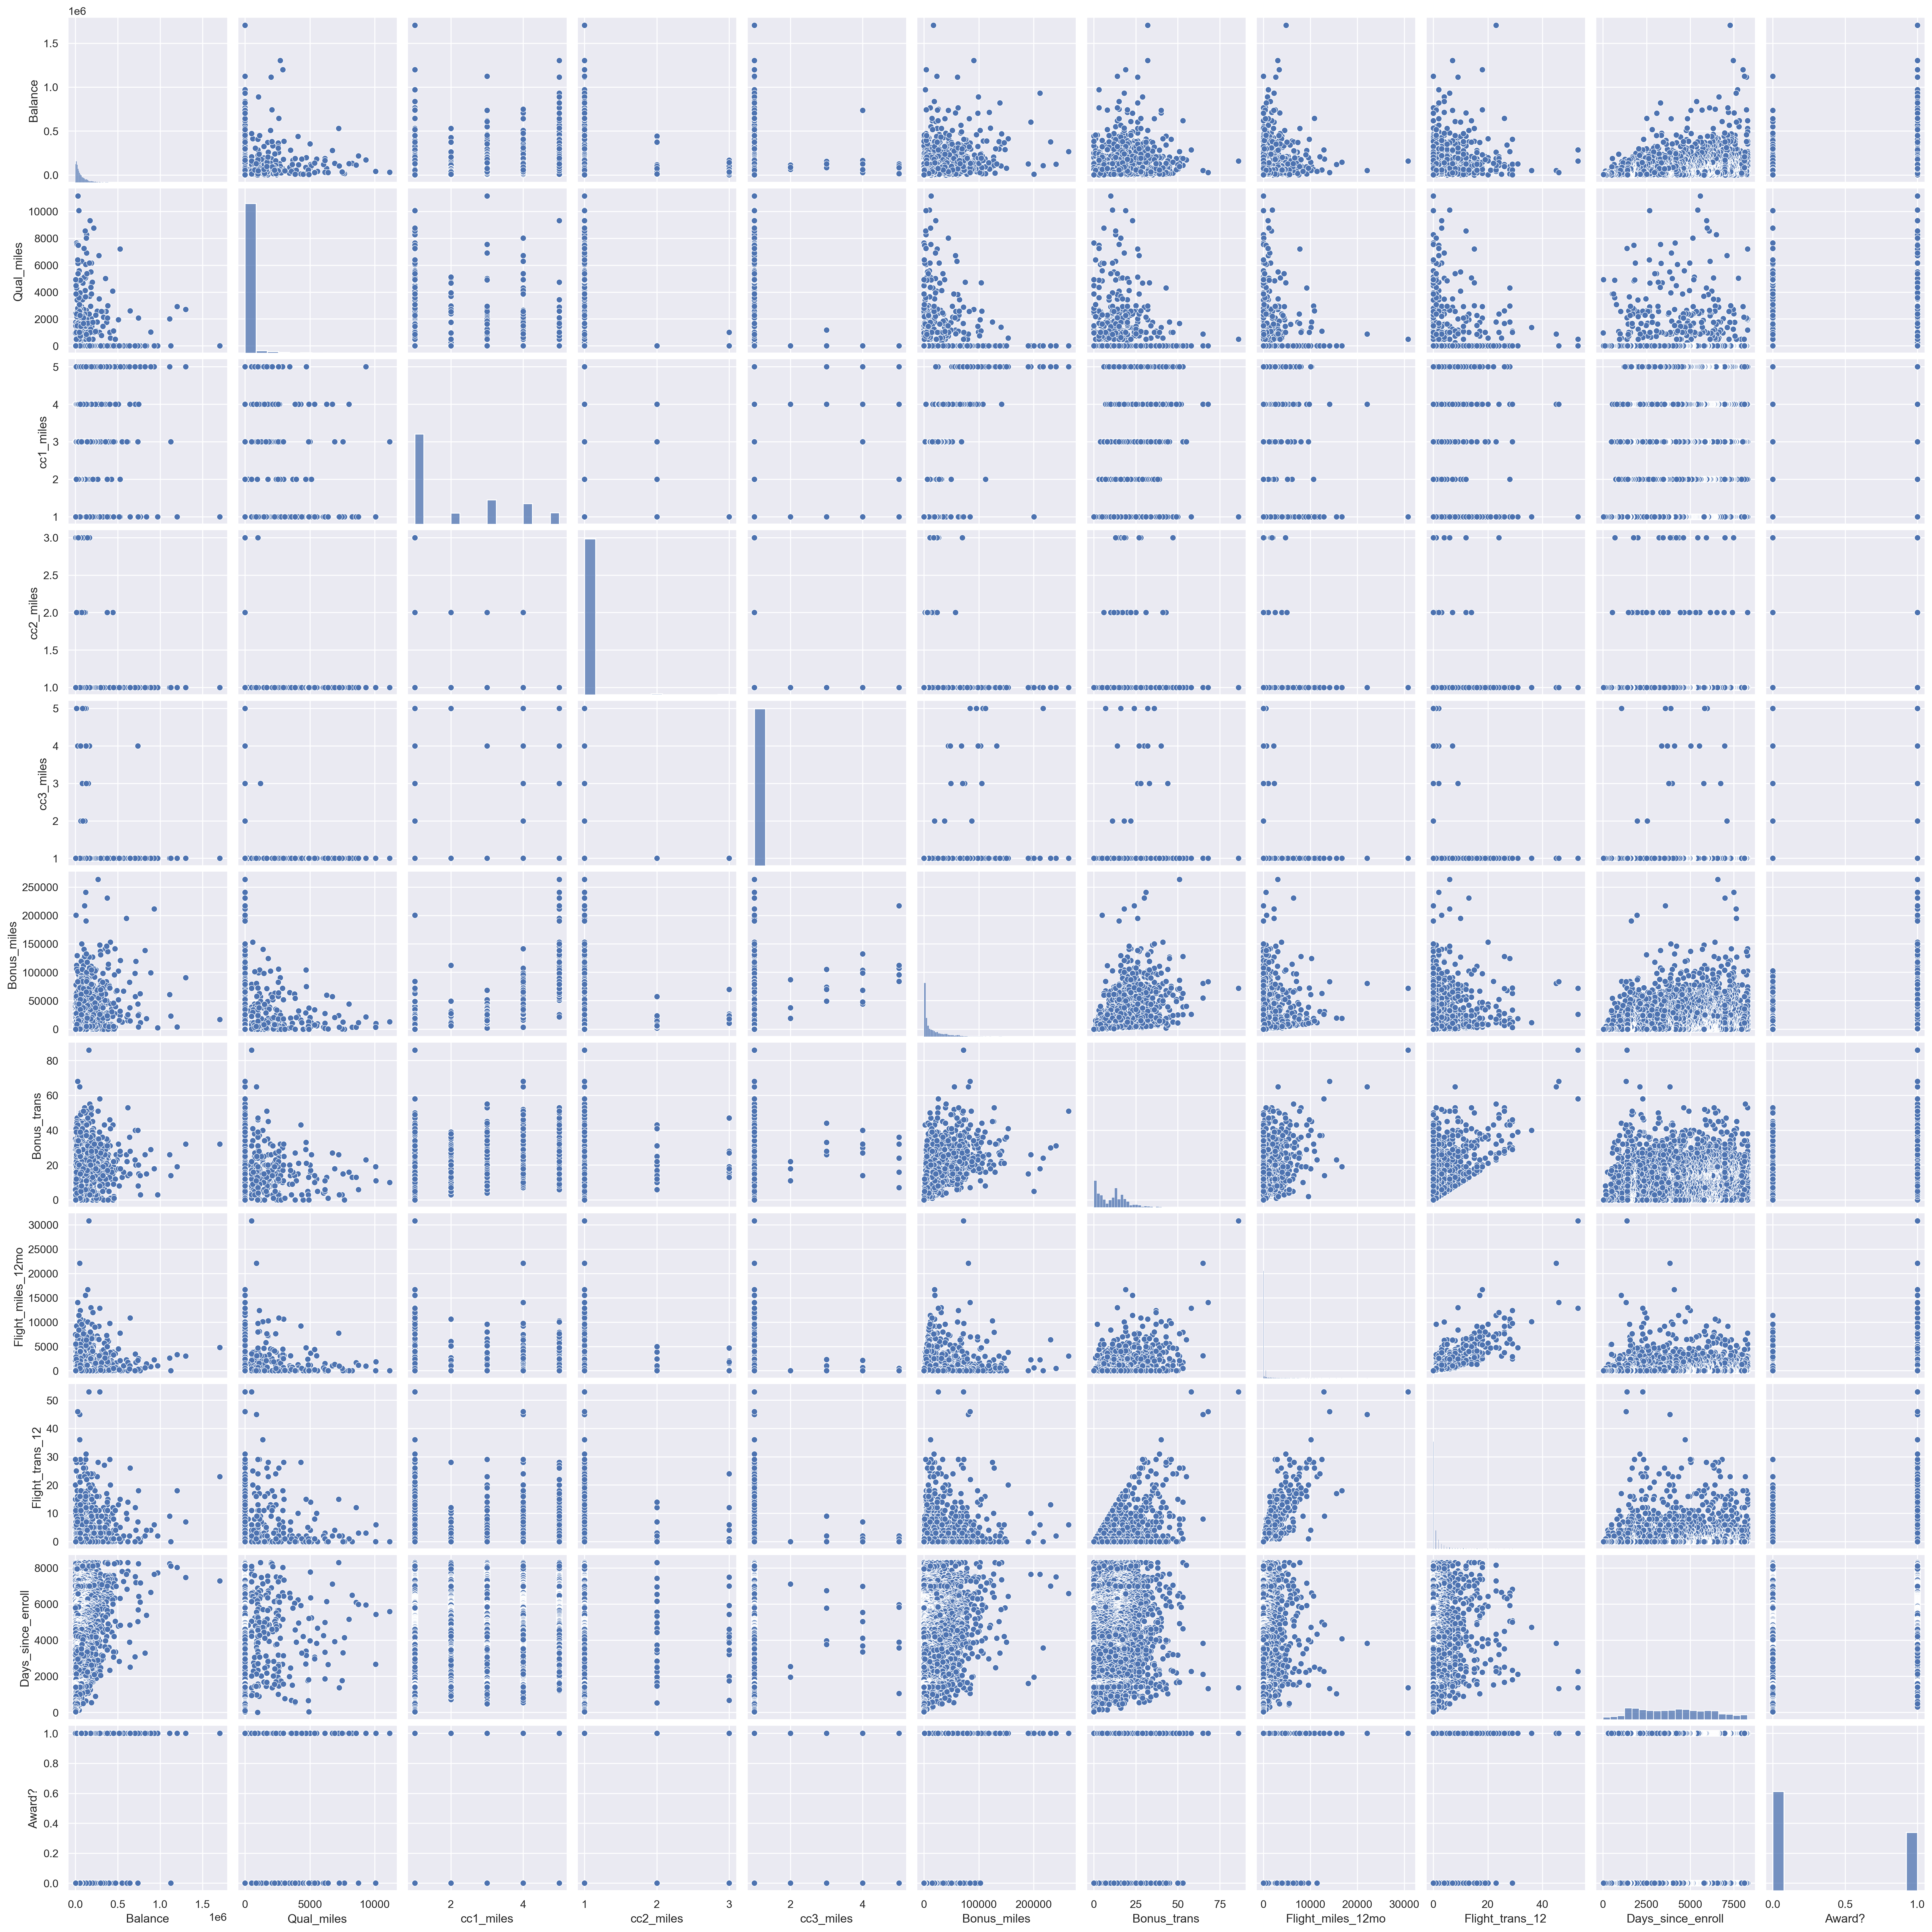

In [4]:
sns.pairplot(df)

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [7]:
pd.DataFrame(x, columns= df.columns)

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    -0.451141   -0.186299  -0.769578  -0.098242  -0.062767    -0.702786   
1    -0.539457   -0.186299  -0.769578  -0.098242  -0.062767    -0.701088   
2    -0.320031   -0.186299  -0.769578  -0.098242  -0.062767    -0.539253   
3    -0.583799   -0.186299  -0.769578  -0.098242  -0.062767    -0.689286   
4     0.239678   -0.186299   1.409471  -0.098242  -0.062767     1.083121   
...        ...         ...        ...        ...        ...          ...   
3994 -0.547079   -0.186299  -0.769578  -0.098242  -0.062767    -0.356960   
3995 -0.091465   -0.186299  -0.769578  -0.098242  -0.062767    -0.669367   
3996 -0.000043   -0.186299   0.683121  -0.098242  -0.062767     0.343804   
3997 -0.185607   -0.186299  -0.769578  -0.098242  -0.062767    -0.689286   
3998 -0.700508   -0.186299  -0.769578  -0.098242  -0.062767    -0.709992   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0       -1.104065          -0.328603        -0.362168           1.395454   
1       -0.999926          -0.328603        -0.362168           1.379957   
2       -0.791649          -0.328603        -0.362168           1.411920   
3       -1.104065          -0.328603        -0.362168           1.372208   
4        1.499394           1.154932         0.692490           1.363975   
...           ...                ...              ...                ...   
3994    -0.791649          -0.185750        -0.098503          -1.315120   
3995    -0.687511          -0.328603        -0.362168          -1.318994   
3996    -0.375096          -0.328603        -0.362168          -1.315604   
3997    -1.104065           0.028531        -0.098503          -1.316088   
3998    -1.208203          -0.328603        -0.362168          -1.317541   

        Award?  
0    -0.766919  
1    -0.766919  
2    -0.766919  
3    -0.766919  
4     1.303918  
...        ...  
3994  1.303918  
3995  1.303918  
3996  1.303918  
3997 -0.766919  
3998 -0.766919  

[3999 rows x 11 columns]

In [8]:
#heirachal clustering 

In [9]:
from scipy.cluster import hierarchy

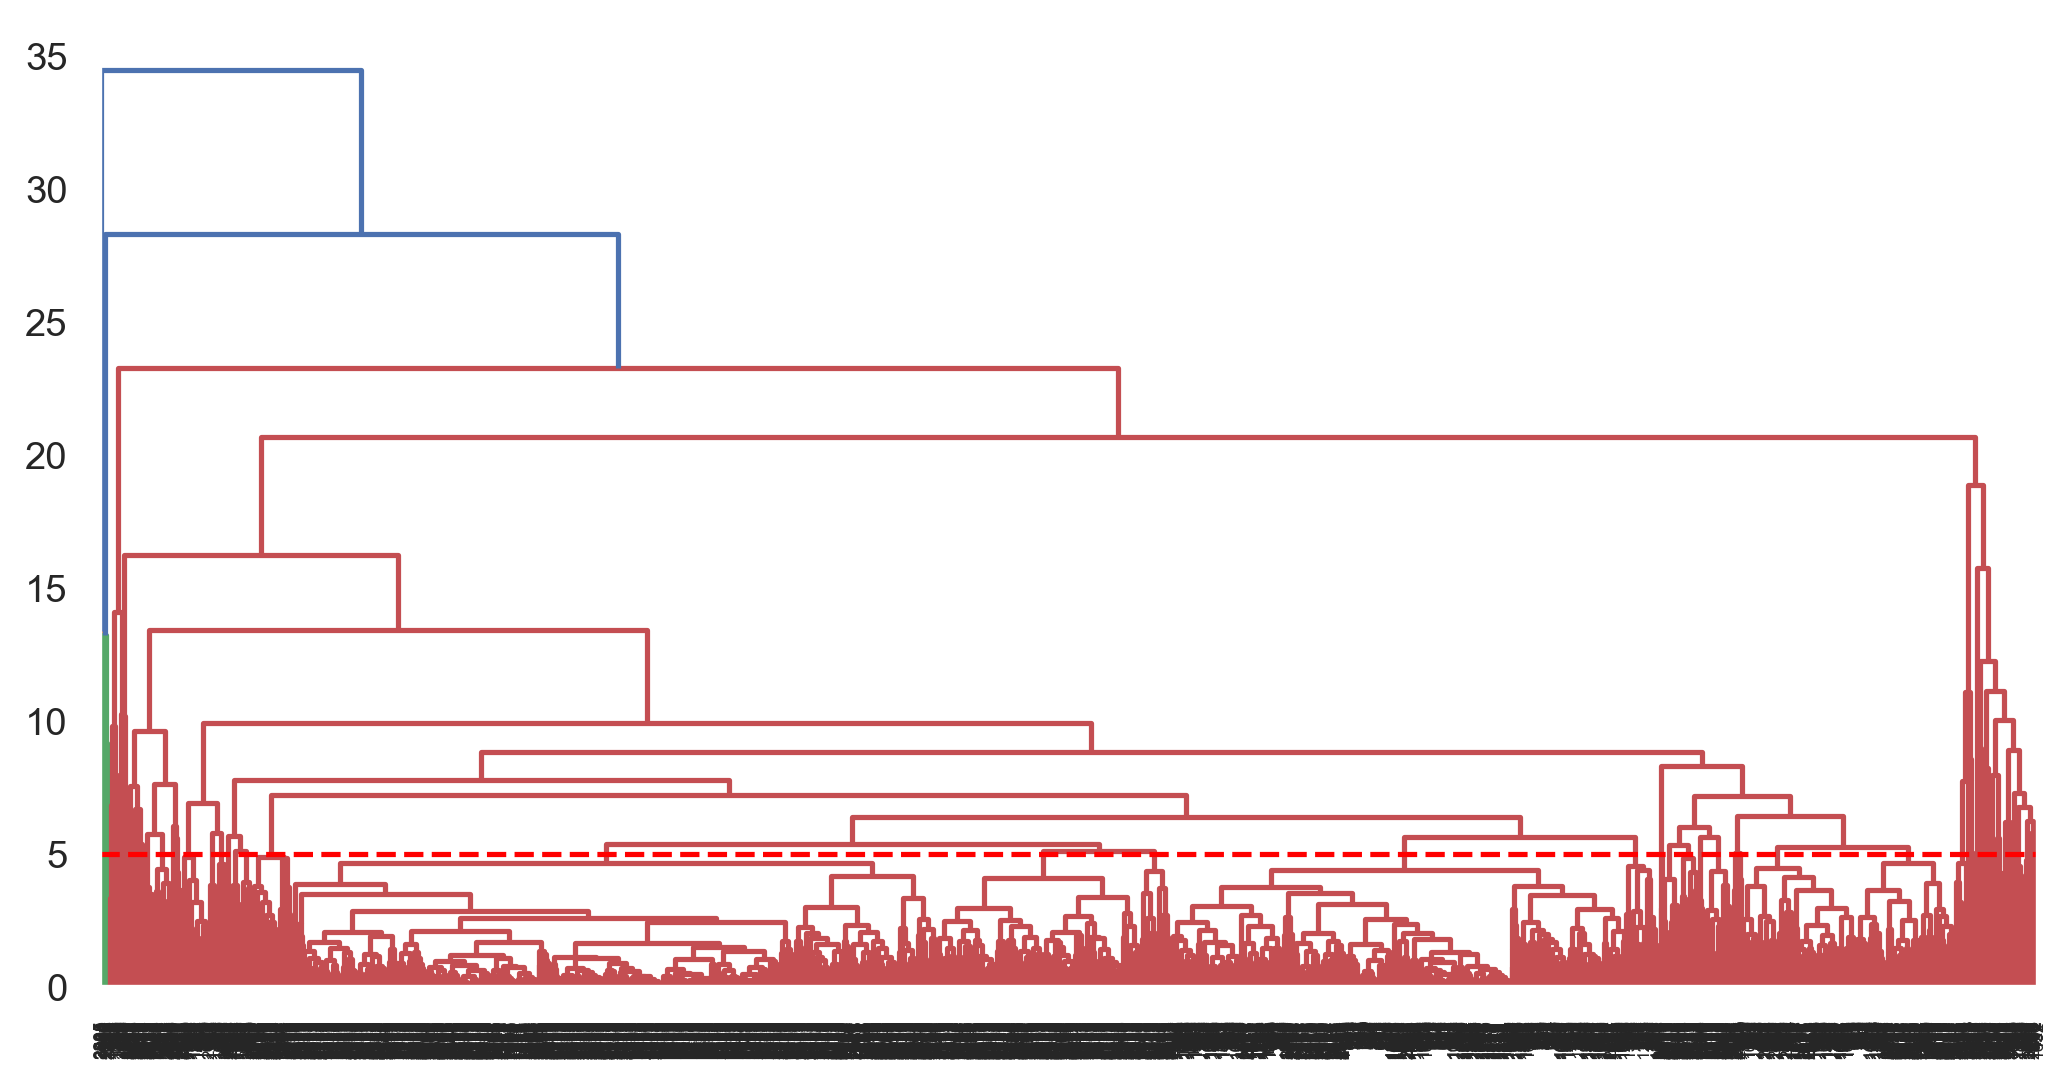

In [10]:
lk = hierarchy.linkage(x, method='complete') 
dendrogram = hierarchy.dendrogram(lk)
plt.axhline(y = 5, linestyle = '--', color = 'red')

In [11]:
from sklearn.cluster import AgglomerativeClustering

In [12]:
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [13]:
y=pd.DataFrame(hclusters.fit_predict(df),columns=['clusters'])
y['clusters'].value_counts()

2    2185
4    1030
1     624
3     134
0      26
Name: clusters, dtype: int64

In [14]:
df['clusters']=hclusters.labels_
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  clusters  
0          0         2  
1          0         2  
2          0         2  
3          0         2  
4          1         4  
...      ...       ...  
3994       1         2  
3995       1         4  
3996       1         4  
3997       0         4  
3998       0         2  

[3999 rows x 12 columns]

In [15]:
df.groupby('clusters').agg(['mean']).reset_index()

clusters        Balance  Qual_miles cc1_miles cc2_miles cc3_miles  \
                     mean        mean      mean      mean      mean   
0        0  841016.769231  512.692308  3.346154  1.000000  1.115385   
1        1  158510.772436  276.342949  3.035256  1.008013  1.060897   
2        2   22129.604577   95.710755  1.469565  1.018307  1.000000   
3        3  355242.694030  424.671642  3.059701  1.022388  1.000000   
4        4   75338.683495  120.885437  2.557282  1.009709  1.007767   

    Bonus_miles Bonus_trans Flight_miles_12mo Flight_trans_12  \
           mean        mean              mean            mean   
0  52888.269231   22.346154       1797.807692        6.653846   
1  35739.006410   17.153846        851.137821        2.493590   
2   7136.640732    8.241190        225.946453        0.712128   
3  46811.955224   19.574627       1582.291045        4.835821   
4  22349.167961   14.059223        539.990291        1.514563   

  Days_since_enroll    Award?  
               mean      mean  
0       6447.269231  0.846154  
1       4945.536859  0.483974  
2       3656.610984  0.298398  
3       5654.537313  0.701493  
4       4338.904854  0.399029

In [16]:
df.groupby('clusters').agg('mean')

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
clusters                                                               
0         841016.769231  512.692308   3.346154   1.000000   1.115385   
1         158510.772436  276.342949   3.035256   1.008013   1.060897   
2          22129.604577   95.710755   1.469565   1.018307   1.000000   
3         355242.694030  424.671642   3.059701   1.022388   1.000000   
4          75338.683495  120.885437   2.557282   1.009709   1.007767   

           Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
clusters                                                                  
0         52888.269231    22.346154        1797.807692         6.653846   
1         35739.006410    17.153846         851.137821         2.493590   
2          7136.640732     8.241190         225.946453         0.712128   
3         46811.955224    19.574627        1582.291045         4.835821   
4         22349.167961    14.059223         539.990291         1.514563   

          Days_since_enroll    Award?  
clusters                               
0               6447.269231  0.846154  
1               4945.536859  0.483974  
2               3656.610984  0.298398  
3               5654.537313  0.701493  
4               4338.904854  0.399029

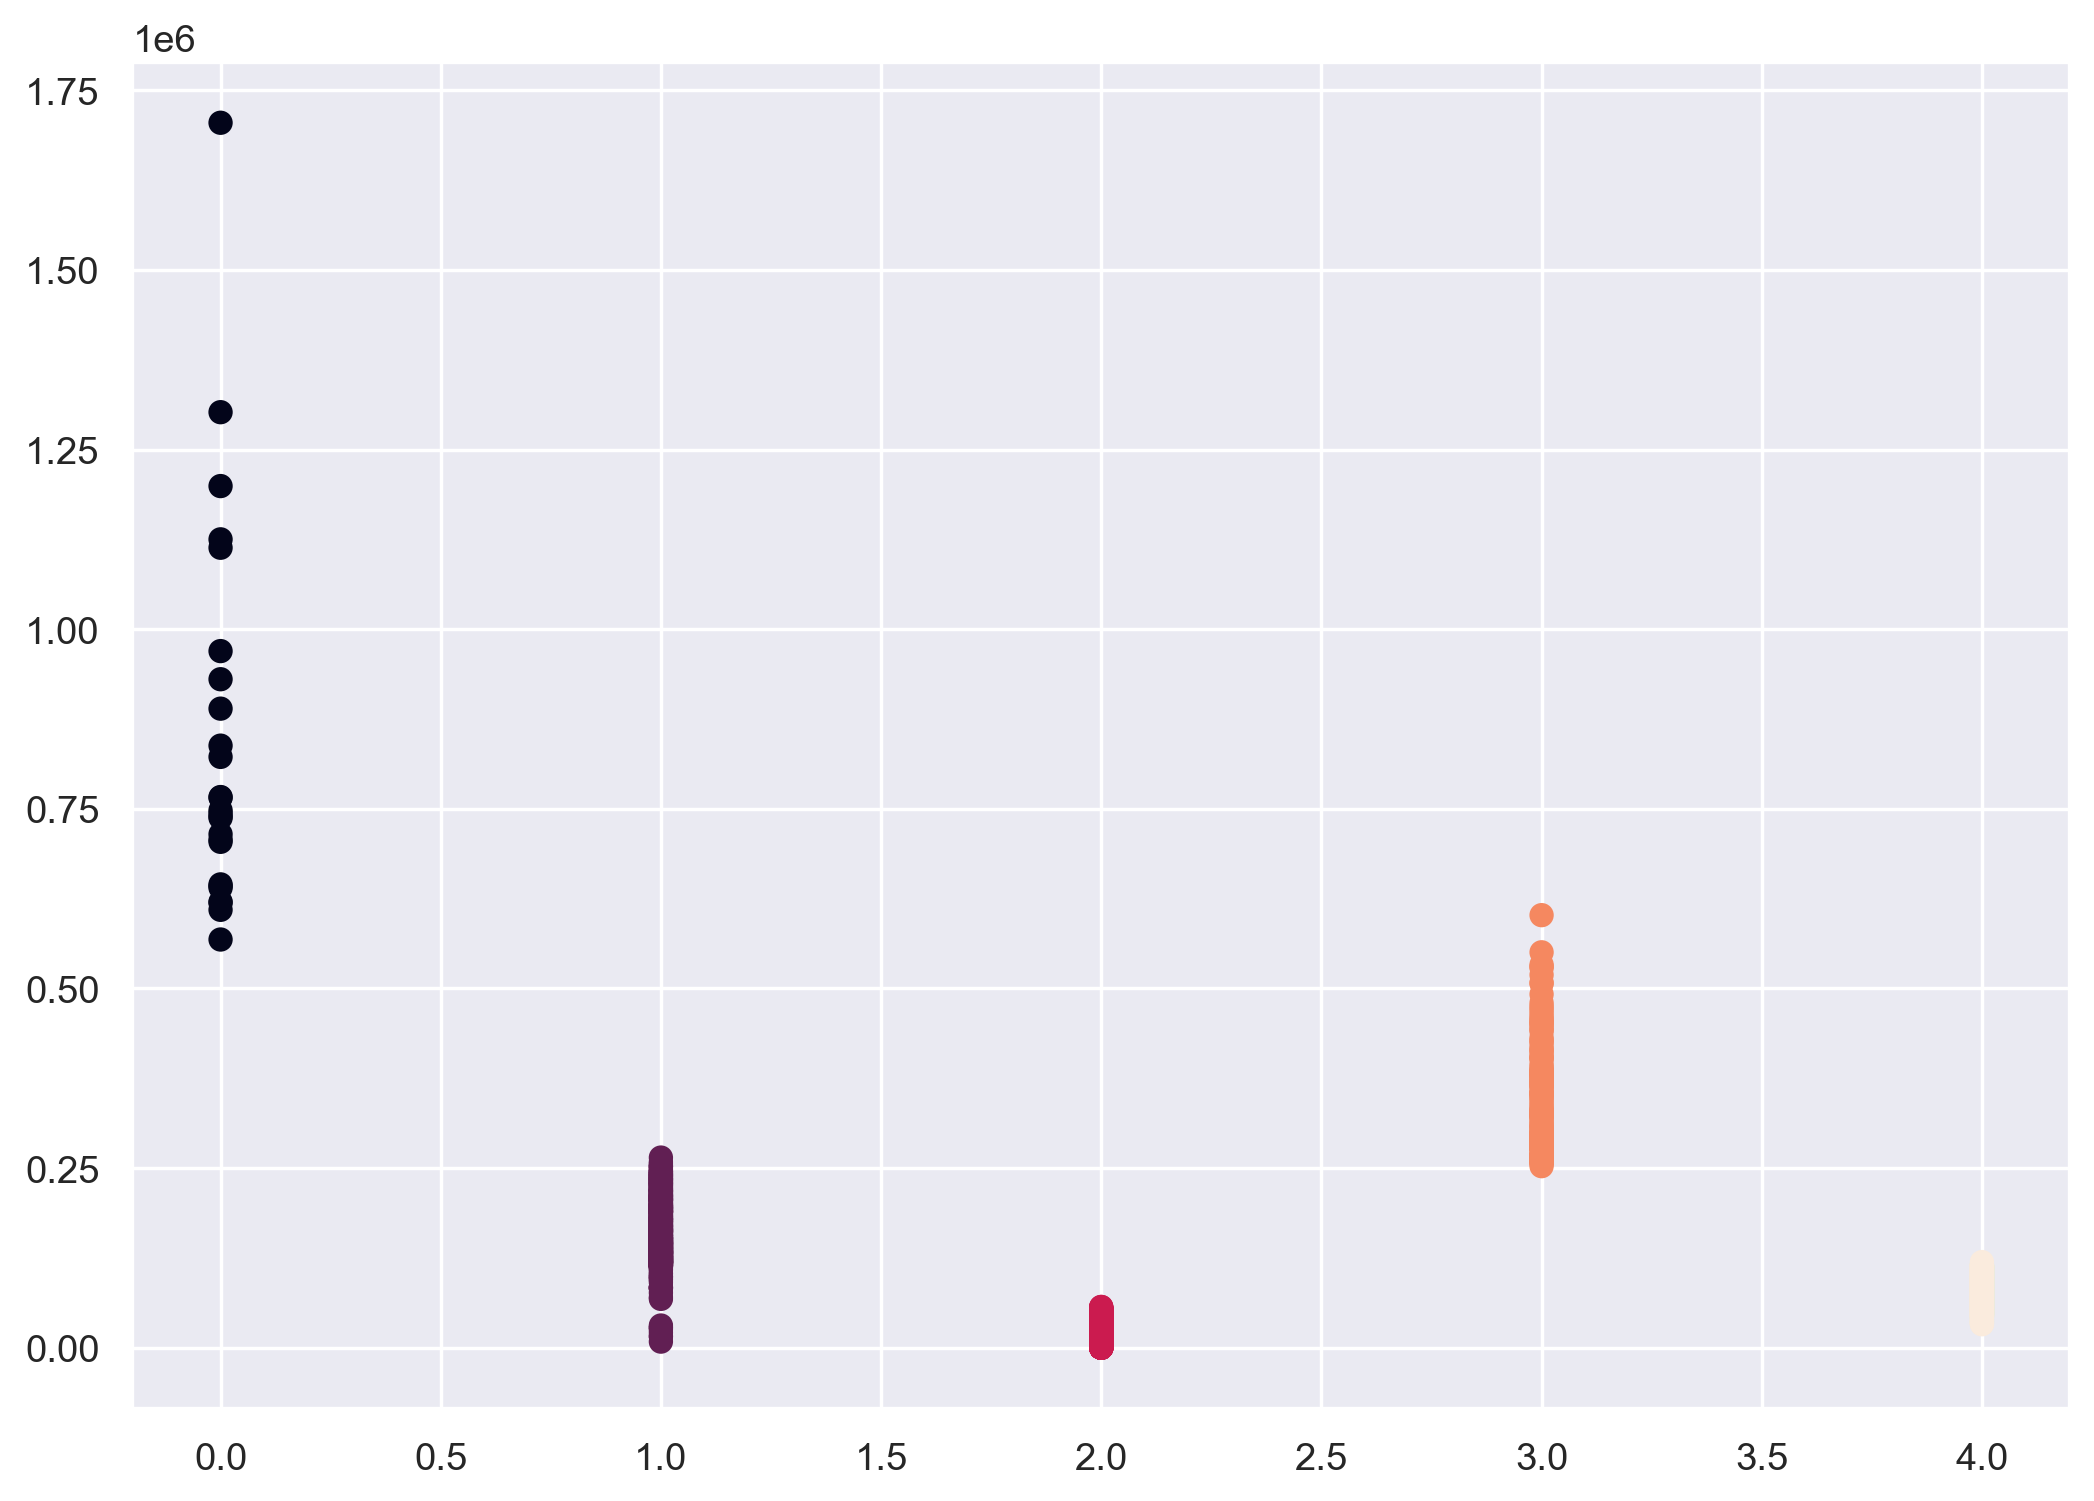

In [17]:
plt.figure(figsize=(10, 7))  
plt.scatter(df['clusters'],df['Balance'], c=hclusters.labels_) 

In [18]:
#K-means

In [19]:
from sklearn.cluster import KMeans

In [20]:
km = KMeans() #default 8 clusters
yp = km.fit_predict(x) 
yp

array([1, 1, 1, ..., 4, 1, 1], dtype=int32)

In [21]:
km.cluster_centers_

array([[ 0.31851341, -0.15048853,  0.71086013, -0.09824189, -0.04827571,
         0.25859992,  0.56818837, -0.20272837, -0.22455512,  0.20514841,
        -0.7669193 ],
       [-0.38219034, -0.14280918, -0.73367189, -0.09824189, -0.06276658,
        -0.6060545 , -0.67975808, -0.20609667, -0.22852968, -0.30386596,
        -0.7669193 ],
       [ 1.31682908,  0.5687692 ,  0.17151827, -0.09824189, -0.06276658,
         0.77604638,  1.86523705,  4.20437953,  4.41818486,  0.30147998,
         0.90775795],
       [ 0.41182718,  7.12219641, -0.0297777 , -0.09824189, -0.06276658,
         0.04544156,  0.05881382,  0.30911931,  0.34093757, -0.07634936,
         0.30684827],
       [-0.13957879, -0.06069245, -0.24484571, -0.09824189, -0.06276658,
        -0.26016661, -0.09297572, -0.0311499 , -0.02467726,  0.06973695,
         1.30391816],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.337

In [22]:
km.inertia_

17375.106118597752

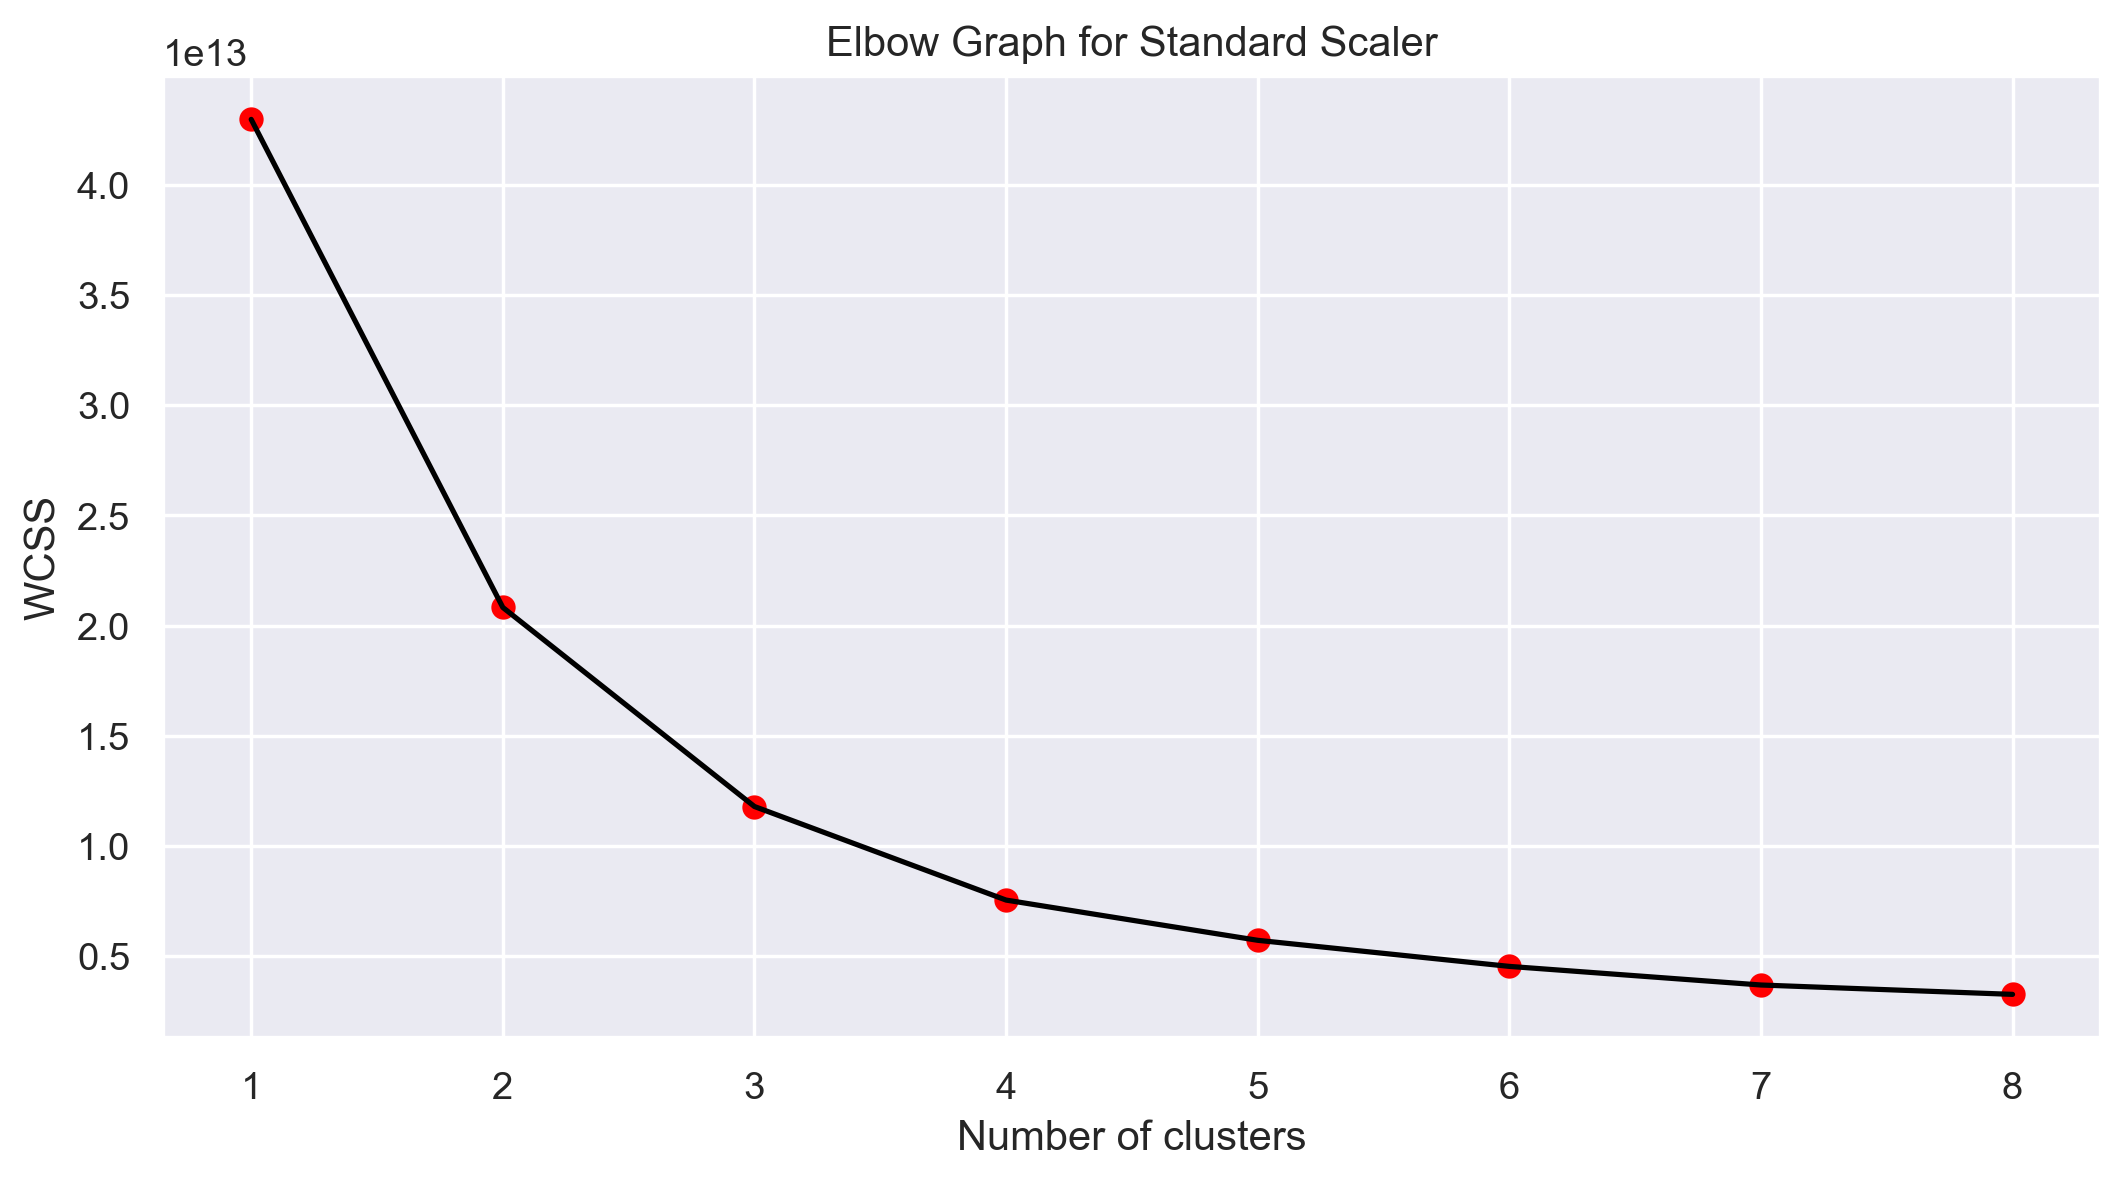

In [23]:
wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
km = KMeans(n_clusters=2) 
ypred = km.fit_predict(x) 
ypred

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [25]:
km.cluster_centers_

array([[ 0.58725434,  0.14747378,  1.127312  , -0.0305058 ,  0.12637268,
         1.0069909 ,  0.91477774,  0.36332385,  0.40428466,  0.39851327,
         0.7033753 ],
       [-0.28285685, -0.0710322 , -0.54298095,  0.01469342, -0.06086865,
        -0.48502711, -0.44061173, -0.17499852, -0.1947277 , -0.19194785,
        -0.33878766]])

In [26]:
from sklearn.metrics import silhouette_score

In [27]:
silhouette_score(x,ypred)

0.3256981835090824

In [28]:
df['cluster'] = ypred  
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  clusters  cluster  
0          0         2        1  
1          0         2        1  
2          0         2        1  
3          0         2        1  
4          1         4        0  
...      ...       ...      ...  
3994       1         2        1  
3995       1         4        1  
3996       1         4        1  
3997       0         4        1  
3998       0         2        1  

[3999 rows x 13 columns]

In [29]:
df.groupby('cluster').agg('mean') 

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
cluster                                                               
0        132774.874615  258.195385   3.611538   1.010000   1.036923   
1         45099.804372   89.166358   1.311967   1.016673   1.000371   

          Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
cluster                                                                  
0        41461.610000    20.386154         968.721538         2.906923   
1         5432.436828     7.370878         215.051871         0.635050   

         Days_since_enroll    Award?  clusters  
cluster                                         
0              4941.440000  0.710000  2.409231  
1              3722.210819  0.206743  2.365320

In [30]:
#clustering is done on the bases of balance - higher balance = 0 else 1

In [31]:
#DBSCAN

In [32]:
df.describe() #diff between min and 25% and max and 75% - outlier present

Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03   3999.000000  3999.000000  3999.000000  3999.000000   
mean   7.360133e+04    144.114529     2.059515     1.014504     1.012253   
std    1.007757e+05    773.663804     1.376919     0.147650     0.195241   
min    0.000000e+00      0.000000     1.000000     1.000000     1.000000   
25%    1.852750e+04      0.000000     1.000000     1.000000     1.000000   
50%    4.309700e+04      0.000000     1.000000     1.000000     1.000000   
75%    9.240400e+04      0.000000     3.000000     1.000000     1.000000   
max    1.704838e+06  11148.000000     5.000000     3.000000     5.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    3999.000000   3999.00000        3999.000000      3999.000000   
mean    17144.846212     11.60190         460.055764         1.373593   
std     24150.967826      9.60381        1400.209171         3.793172   
min         0.000000      0.00000           0.000000         0.000000   
25%      1250.000000      3.00000           0.000000         0.000000   
50%      7171.000000     12.00000           0.000000         0.000000   
75%     23800.500000     17.00000         311.000000         1.000000   
max    263685.000000     86.00000       30817.000000        53.000000   

       Days_since_enroll       Award?     clusters      cluster  
count         3999.00000  3999.000000  3999.000000  3999.000000  
mean          4118.55939     0.370343     2.379595     0.674919  
std           2065.13454     0.482957     1.049759     0.468464  
min              2.00000     0.000000     0.000000     0.000000  
25%           2330.00000     0.000000     2.000000     0.000000  
50%           4096.00000     0.000000     2.000000     1.000000  
75%           5790.50000     1.000000     4.000000     1.000000  
max           8296.00000     1.000000     4.000000     1.000000

<Axes: >

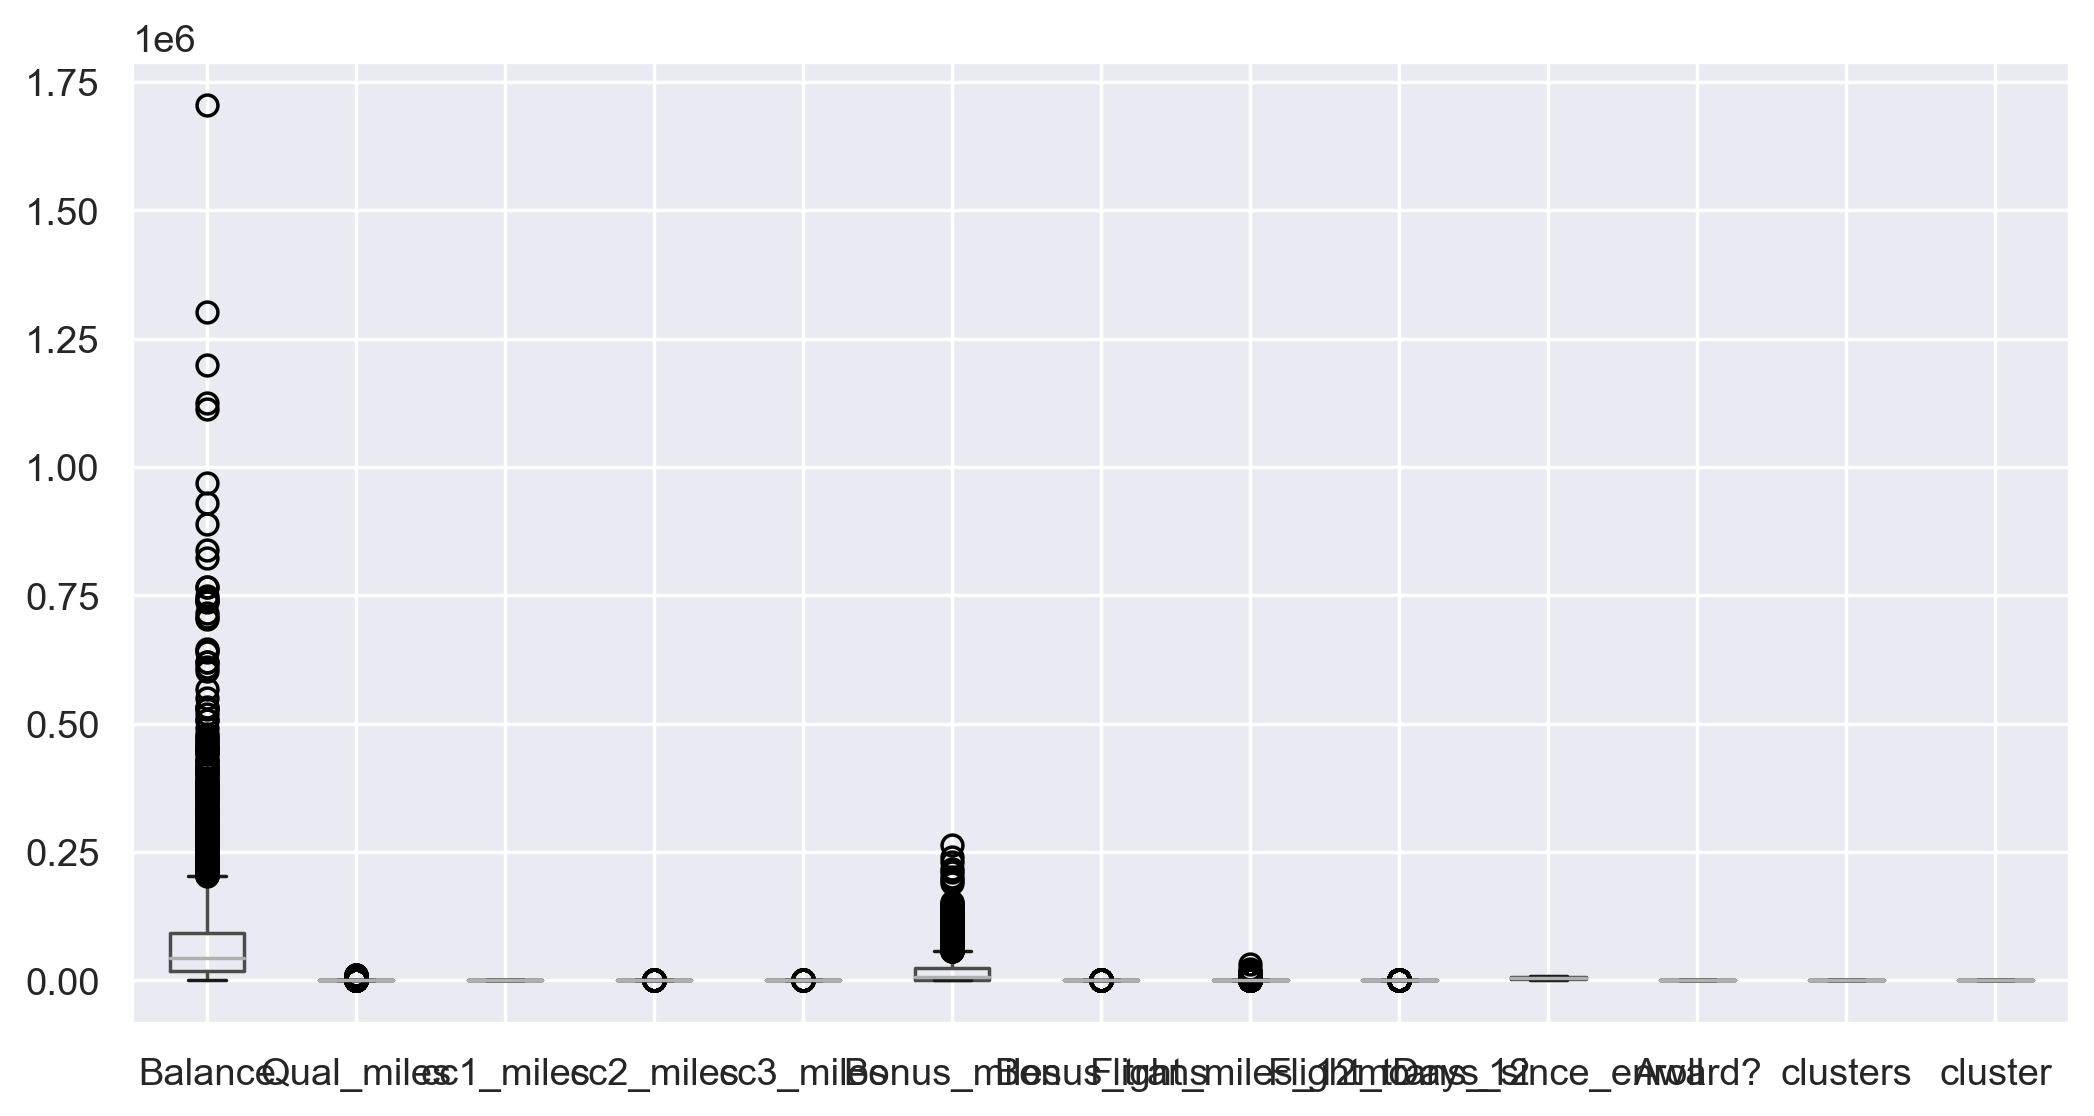

In [33]:
df.boxplot() #presence of outlier

In [34]:
from sklearn.cluster import DBSCAN

In [35]:
db = DBSCAN(eps=0.5, min_samples=5)  

y = db.fit_predict(x)

In [36]:
y #-1 is outlier 

array([ 0,  0,  0, ..., -1,  0,  0])

In [37]:
df['cluster'] = y 
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  clusters  cluster  
0          0         2        0  
1          0         2        0  
2          0         2        0  
3          0         2        0  
4          1         4       -1  
...      ...       ...      ...  
3994       1         2        1  
3995       1         4        1  
3996       1         4       -1  
3997       0         4        0  
3998       0         2        0  

[3999 rows x 13 columns]

In [38]:
from sklearn.metrics import silhouette_score

In [39]:
silhouette_score(x,y)

-0.07834757831741163

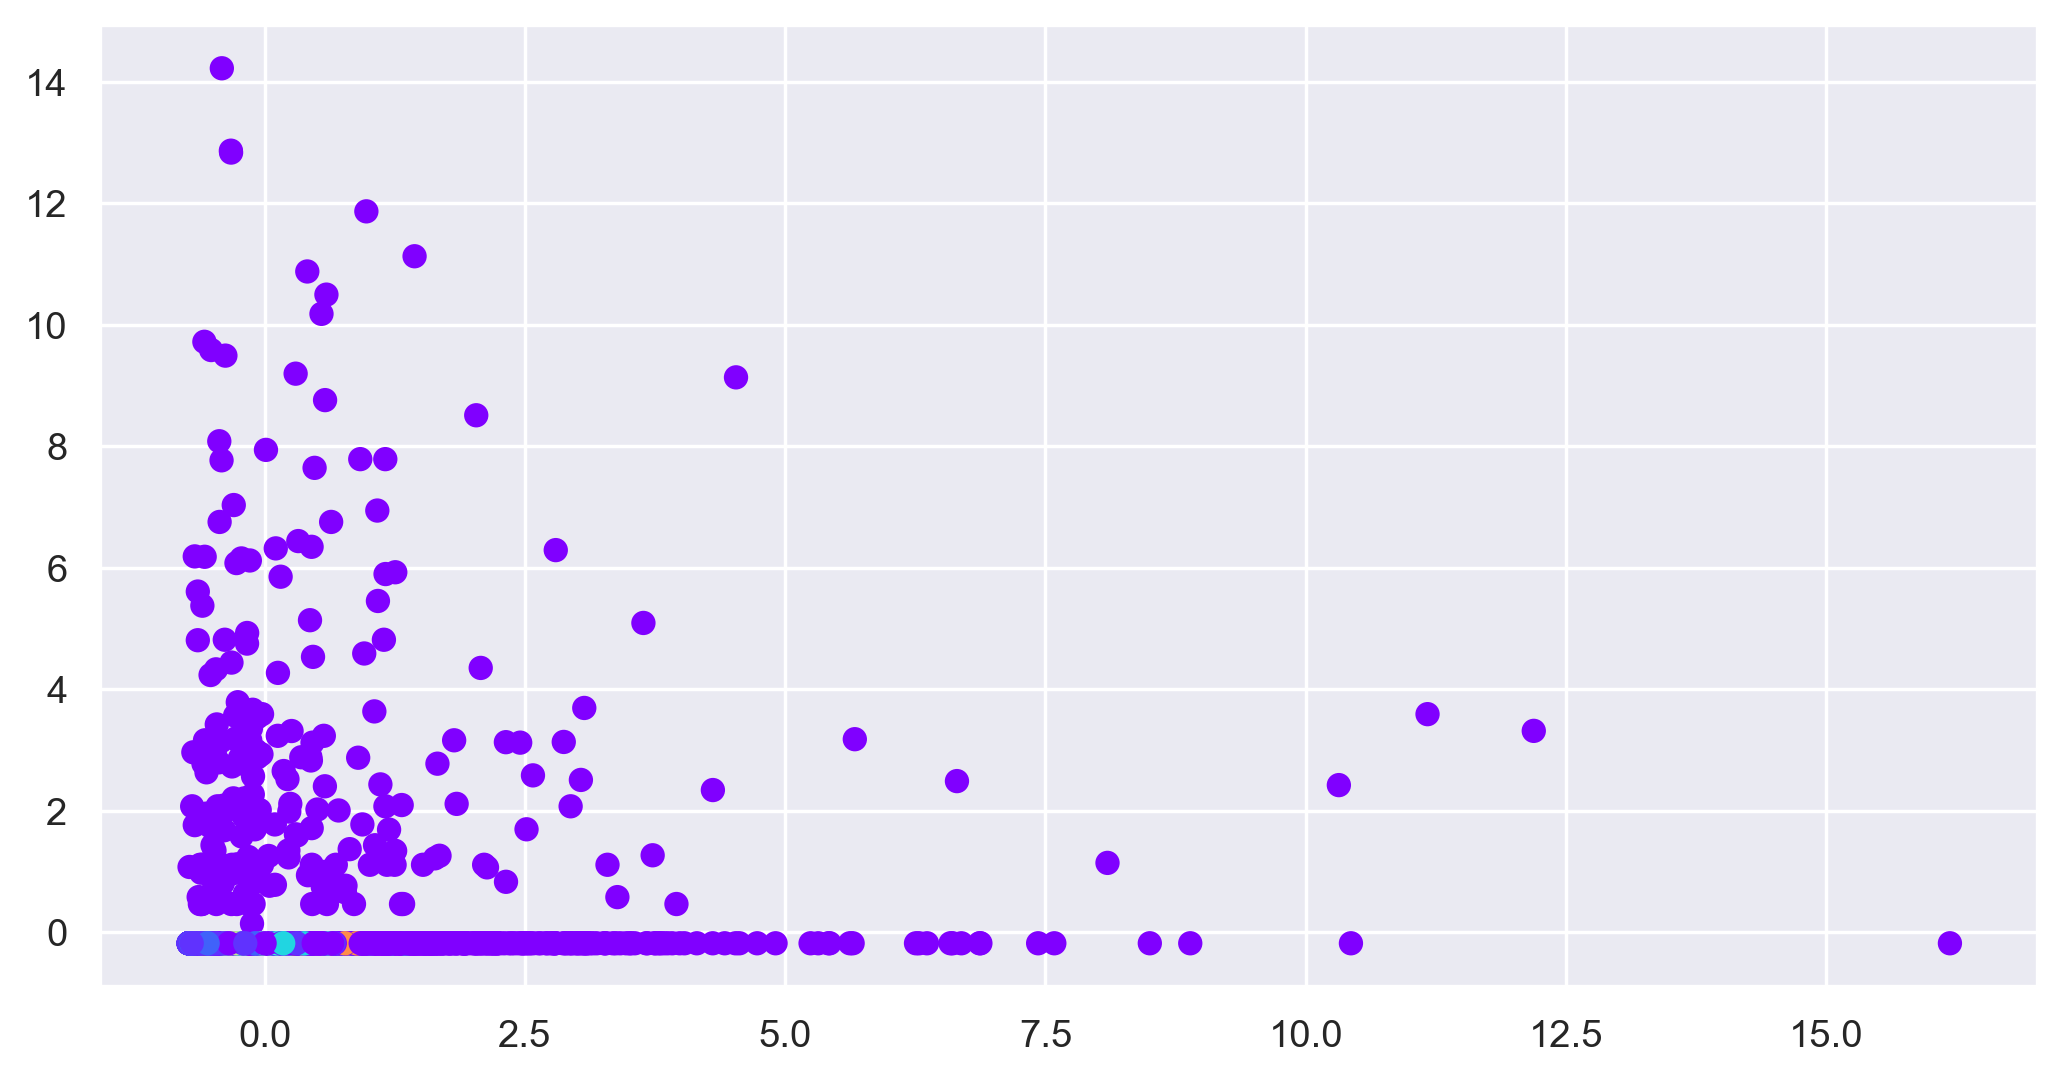

In [40]:
plt.scatter(x[:,0],x[:,1],c = y,cmap='rainbow') #plotting any two col


In [41]:
from sklearn.neighbors import NearestNeighbors

In [42]:
neigh = NearestNeighbors(n_neighbors=3).fit(x) #kvalue-3
d,index = neigh.kneighbors(x)

In [43]:
neigh.kneighbors(x)

(array([[0.        , 0.11184685, 0.12034246],
        [0.        , 0.11406276, 0.11437601],
        [0.        , 0.16540223, 0.19458949],
        ...,
        [0.        , 0.16614779, 0.28024323],
        [0.        , 0.25725534, 0.27167409],
        [0.        , 0.00270574, 0.0112955 ]]),
 array([[   0,  378,  363],
        [   1,    3,  363],
        [   2,  338,  368],
        ...,
        [3996, 3877, 3800],
        [3997, 3623, 3882],
        [3998, 3491, 3455]]))

In [44]:
pd.DataFrame(d)

0         1         2
0     0.0  0.111847  0.120342
1     0.0  0.114063  0.114376
2     0.0  0.165402  0.194589
3     0.0  0.048375  0.058575
4     0.0  0.545493  0.735055
...   ...       ...       ...
3994  0.0  0.288941  0.335142
3995  0.0  0.312801  0.343099
3996  0.0  0.166148  0.280243
3997  0.0  0.257255  0.271674
3998  0.0  0.002706  0.011296

[3999 rows x 3 columns]

In [45]:
dist = np.sort(d[:,1])

Text(0.5, 1.0, 'k-dist graph')

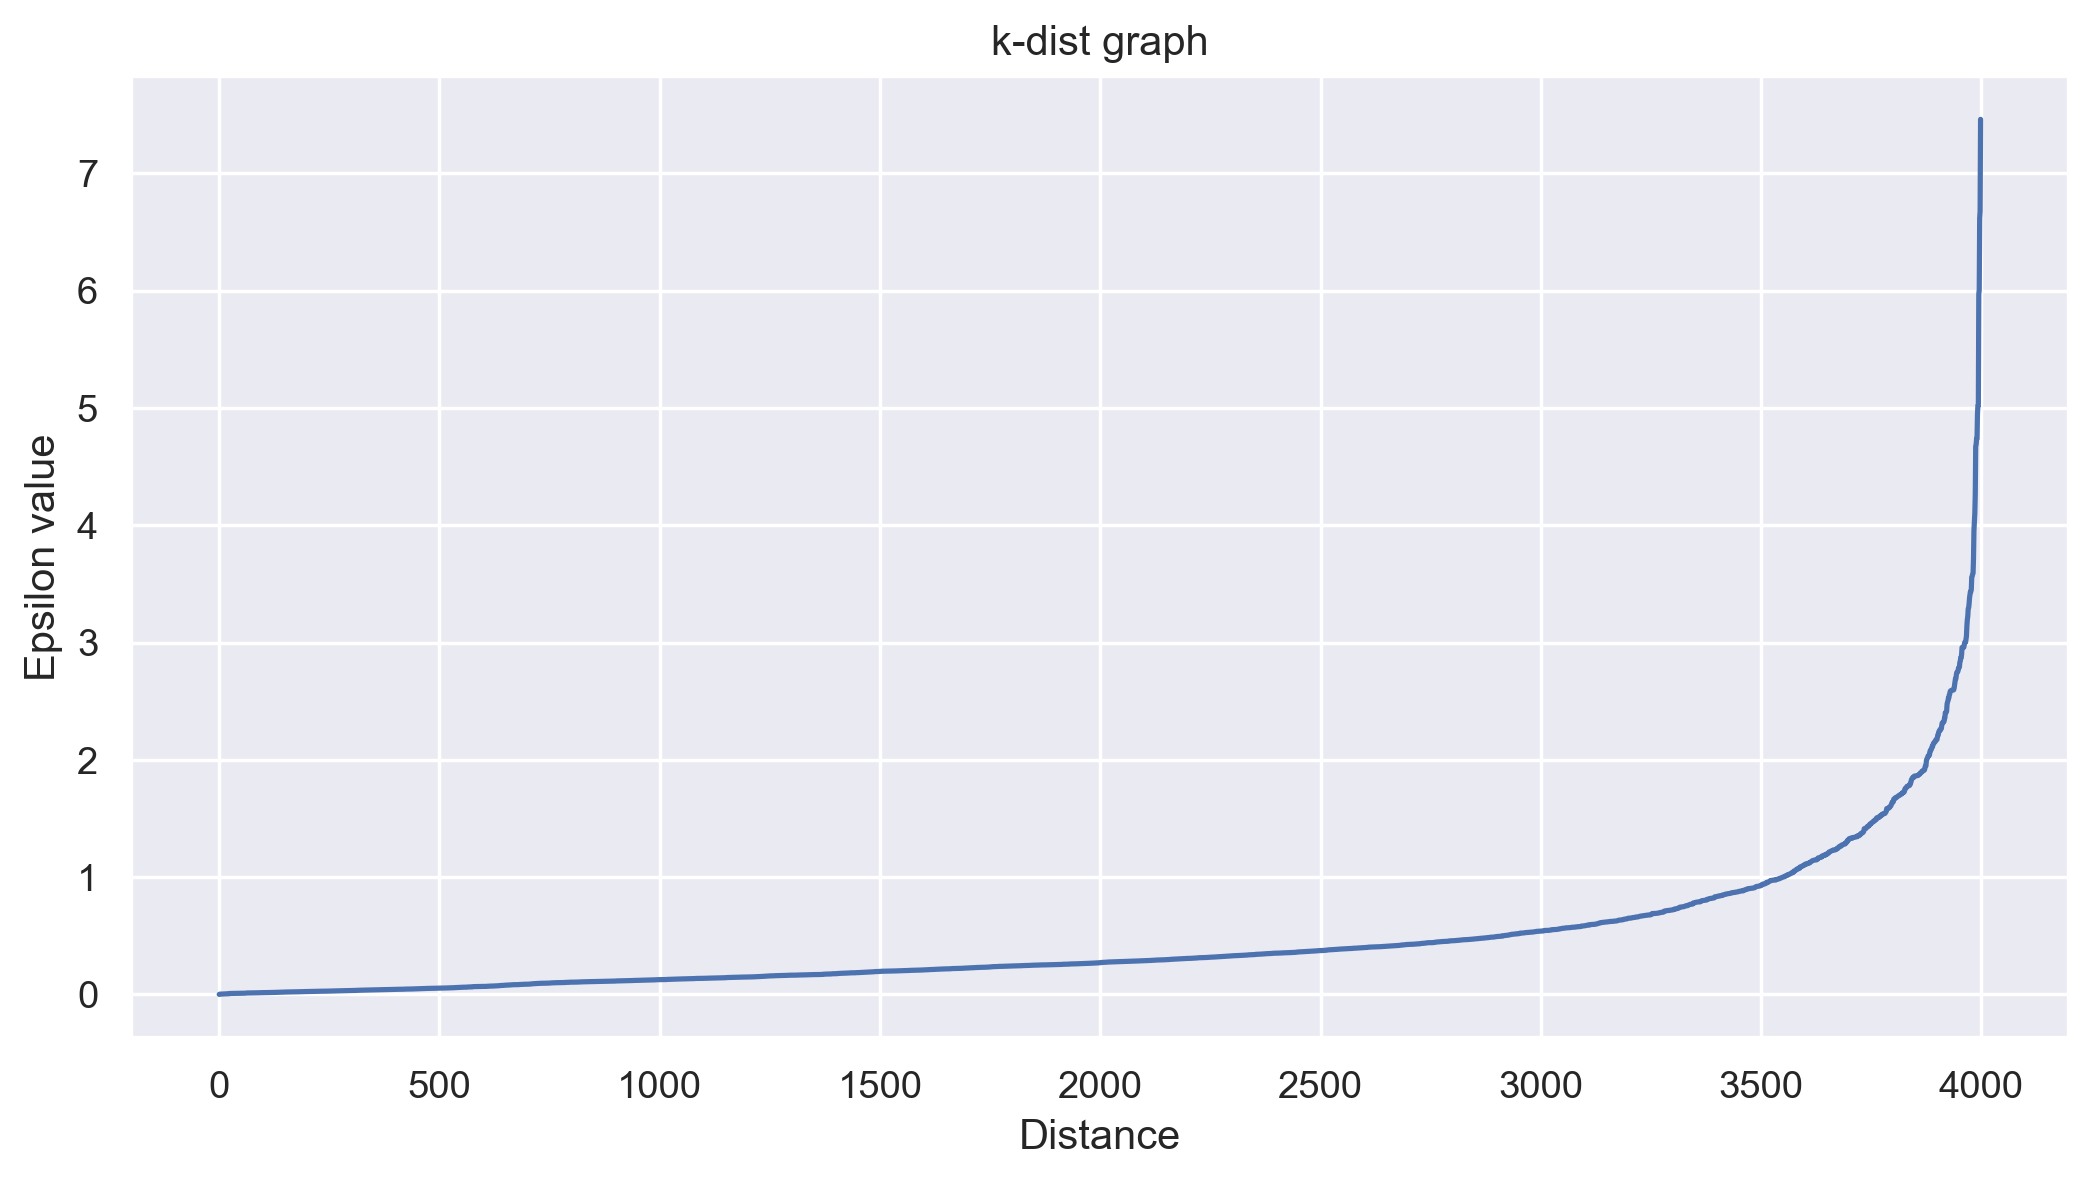

In [46]:
plt.plot(dist)
plt.xlabel('Distance')
plt.ylabel('Epsilon value')
plt.title ('k-dist graph')

In [47]:
db = DBSCAN(eps=2,min_samples=3)
ypred = db.fit_predict(x)
ypred

array([0, 0, 0, ..., 1, 0, 0])

In [48]:
silhouette_score(x,ypred)

0.2457363433586349

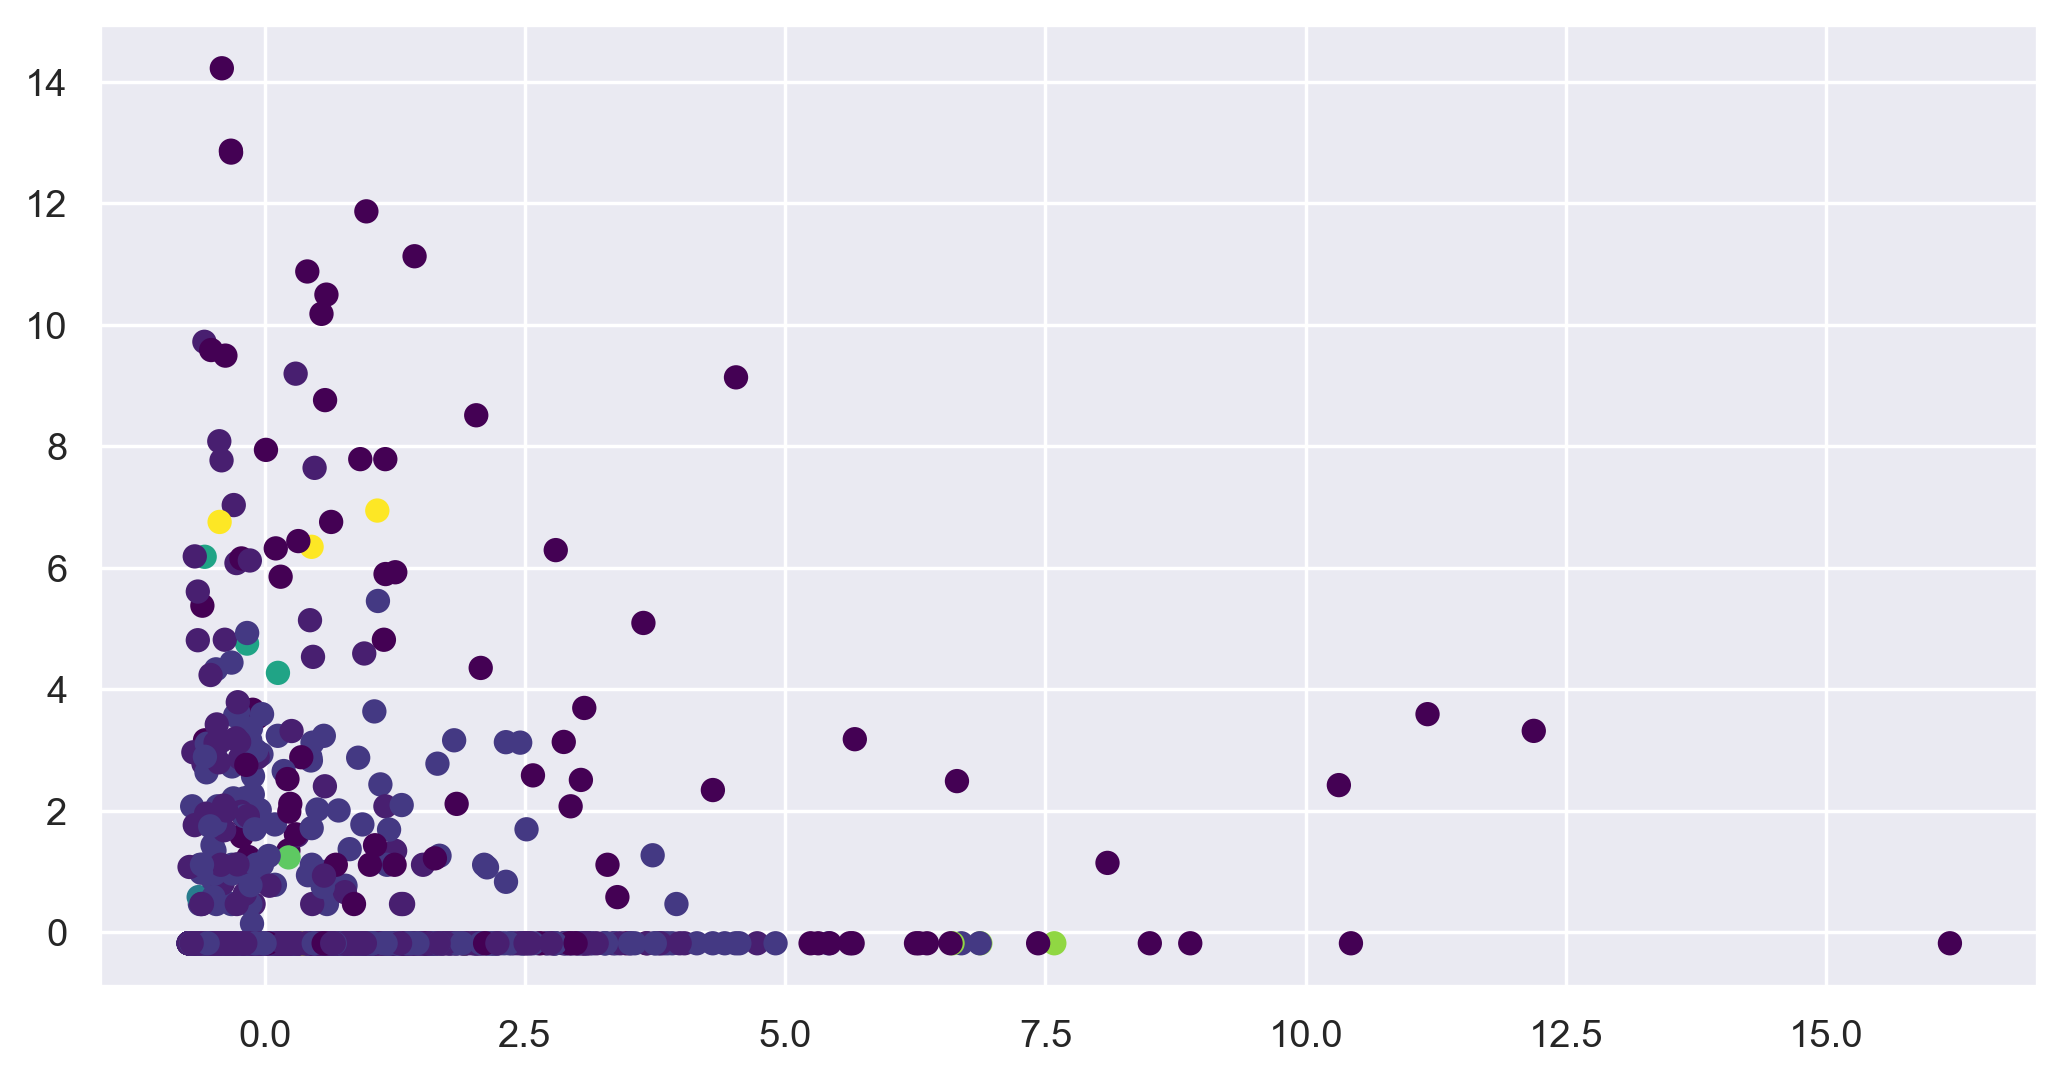

In [49]:
plt.scatter(x[:,0],x[:,1],c = ypred,cmap='viridis')

In [50]:
df['cluster'] = ypred
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  clusters  cluster  
0          0         2        0  
1          0         2        0  
2          0         2        0  
3          0         2        0  
4          1         4        1  
...      ...       ...      ...  
3994       1         2        1  
3995       1         4        1  
3996       1         4        1  
3997       0         4        0  
3998       0         2        0  

[3999 rows x 13 columns]

In [51]:
df.groupby('cluster').agg('mean')

Balance   Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
cluster                                                                
-1       267601.354610  1746.205674   3.000000    1.06383   1.347518   
 0        57970.120619    62.784026   1.697637    1.00000   1.000000   
 1        80686.144874   108.636701   2.658990    1.00000   1.000000   
 2        40618.000000     0.000000   1.000000    2.00000   1.000000   
 3        51096.000000     0.000000   1.000000    3.00000   1.000000   
 4        73323.400000   117.800000   1.000000    1.00000   1.000000   
 5        39218.500000     0.000000   1.000000    2.00000   1.000000   
 6        52906.000000  4062.333333   4.333333    1.00000   1.000000   
 7        20111.500000     0.000000   1.000000    3.00000   1.000000   
 8       106247.500000   273.500000   1.000000    1.00000   1.000000   
 9       781291.333333     0.000000   1.000000    1.00000   1.000000   
 10      164878.000000     0.000000   1.000000    1.00000   1.000000   
 11      110616.000000  5310.666667   1.000000    1.00000   1.000000   

          Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
cluster                                                                  
-1       58378.815603    28.205674        3940.184397        10.787234   
 0        9815.497148     8.915648         191.209046         0.563977   
 1       26317.071322    14.537890         530.512630         1.650074   
 2        8444.142857    14.285714         250.000000         0.714286   
 3       15561.666667    14.333333          44.444444         0.222222   
 4       12311.200000    30.000000        3734.600000        24.800000   
 5        9189.250000    13.500000         209.375000         0.812500   
 6       54419.000000    15.666667         366.666667         1.000000   
 7       18085.500000    20.000000         950.000000         2.500000   
 8        8641.000000    19.250000        6991.000000        18.000000   
 9       17995.000000     8.666667         723.333333         2.000000   
 10      17867.500000    27.000000        7655.000000        25.000000   
 11       5817.666667    13.000000        3691.000000        10.666667   

         Days_since_enroll    Award?  clusters  
cluster                                         
-1             4902.539007  0.751773  1.921986  
 0             3816.730644  0.000000  2.381418  
 1             4579.668648  1.000000  2.431649  
 2             4612.285714  1.000000  2.142857  
 3             3603.444444  0.000000  2.111111  
 4             4324.800000  1.000000  2.400000  
 5             3511.187500  0.000000  2.500000  
 6             5946.666667  1.000000  3.333333  
 7             5325.750000  1.000000  2.000000  
 8             5112.000000  0.000000  2.000000  
 9             6071.000000  1.000000  0.000000  
 10            3707.250000  1.000000  3.000000  
 11            4405.666667  1.000000  1.333333

In [52]:
df[df['cluster']==-1] #outliers

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
8      443003           0          3          2          1         1753   
50     108137           0          1          1          1         6368   
65      53914           0          3          1          1        33767   
70      84409        5031          2          1          1        15436   
87     609477           0          3          1          1        21422   
...       ...         ...        ...        ...        ...          ...   
3846    97510        1678          5          1          1        71609   
3883   126167           0          5          1          1       190160   
3911    55922        2273          1          1          1         8104   
3917   130748           0          4          1          1        65510   
3934    76595           0          1          1          1        10577   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
8              43               3850               12               6948   
50              5               6368                5               6844   
65             45               5550               29               6826   
70             16               1150                4               7766   
87             22               1200                8               6820   
...           ...                ...              ...                ...   
3846           51               7650               26               1665   
3883           15                  0                0               1612   
3911           19               4104               16               1552   
3917           37               6349                7               1545   
3934            2               9577                1               1515   

      Award?  clusters  cluster  
8          1         3       -1  
50         0         4       -1  
65         1         4       -1  
70         0         4       -1  
87         0         0       -1  
...      ...       ...      ...  
3846       1         4       -1  
3883       1         1       -1  
3911       0         4       -1  
3917       0         1       -1  
3934       0         4       -1  

[141 rows x 13 columns]

In [53]:
df['cluster'].value_counts() #141 outliers

 0     2454
 1     1346
-1      141
 5       16
 3        9
 2        7
 4        5
 7        4
 8        4
 10       4
 9        3
 6        3
 11       3
Name: cluster, dtype: int64

In [54]:
df[df['cluster']==0] 

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
5       16420           0          1          1          1            0   
...       ...         ...        ...        ...        ...          ...   
3991    39142           0          3          1          1        14981   
3992    11181           0          1          1          1          929   
3993     3974           0          1          1          1          365   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
5               0                  0                0               6942   
...           ...                ...              ...                ...   
3991           28                  0                0               1408   
3992           12                  0                0               1407   
3993            3                  0                0               1397   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  clusters  cluster  
0          0         2        0  
1          0         2        0  
2          0         2        0  
3          0         2        0  
5          0         2        0  
...      ...       ...      ...  
3991       0         2        0  
3992       0         2        0  
3993       0         2        0  
3997       0         4        0  
3998       0         2        0  

[2454 rows x 13 columns]